Afretec Certification short course

GROUP_10
ASSIGNMENT_2:Unstructured dataset
GROUP MEMBERS:
1.	Hakizimana Emmanuel
2.	UWIRINGIYIMANA Innocent
3.	ITANGISHATSE Musa
4.	Tuyizere   Leonce
5.	KARANGWA   Beatrice
6.	Natete     Emelyne


In [66]:
#Imports necessary libraries.
import pandas as pd
import numpy as np
import re

In [2]:
# Display options (optional, for easier exploration)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 160)

In [5]:
# Load the dataset (CSV OR Excel)
csv_path = r"C:\Users\user\Desktop\Training\Messy_Employee_dataset.csv"

df = pd.read_csv(
    csv_path,
    na_values=["N/A", "NA", "", "null", "None"],
    keep_default_na=True
)


In [35]:
# Inspect structure, datatypes, missing values
print("\n--- Basic shape ---")
print(df.shape)            # (rows, columns)

print("\n--- Columns ---")
print(df.columns.tolist())

print("\n--- dtypes ---")
print(df.dtypes)

print("\n--- .info() ---")
print(df.info())
print("\n--- Missing values (count per column) ---")
print(df.isna().sum())

print("\n--- First 5 rows ---")
print(df.head())

# Optional: quick stats for numeric columns
print("\n--- Numeric summary ---")
print(df.describe())

# Optional: unique counts per column to spot messy categories
print("\n--- Unique counts per column ---")
print(df.nunique())


--- Basic shape ---
(1020, 15)

--- Columns ---
['employee_id', 'first_name', 'last_name', 'age', 'department_region', 'status', 'join_date', 'salary', 'email', 'phone', 'performance_score', 'remote_work', 'department', 'region', 'email_valid']

--- dtypes ---
employee_id                  object
first_name                   object
last_name                    object
age                         float64
department_region            object
status                       object
join_date            datetime64[ns]
salary                      float64
email                        object
phone                        object
performance_score          category
remote_work                 boolean
department                   object
region                       object
email_valid                    bool
dtype: object

--- .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  

In [ ]:
# Data cleaning & type conversions

In [12]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(r"[^\w]+", "_", regex=True)
    .str.lower()
)

In [13]:

if "department_region" in df.columns:
    # Expected format like "DevOps-California"
    dept_region_split = df["department_region"].str.split("-", n=1, expand=True)
    # Assign new columns with safe handling for missing/irregular rows
    df["department"] = dept_region_split[0].str.strip()
    df["region"] = dept_region_split[1].str.strip() if dept_region_split.shape[1] > 1 else np.nan

In [17]:
df["join_date"] = pd.to_datetime(
    df["join_date"],
    format="%m/%d/%Y",
    errors="coerce"
)
#  Numeric conversions
# Example columns found in the dataset: 'age', 'salary', 'phone'
for col in ["age", "salary"]:
    if col in df.columns:
        # Remove any stray characters before numeric conversion (e.g., commas)
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(r"[^\d\.\-]", "", regex=True)  # keep digits, dot
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 'phone' values look numeric but include negatives; treat as strings
if "phone" in df.columns:
    df["phone"] = df["phone"].astype(str).str.strip()
    # Remove non-digits; keep '+' optionally
    df["phone"] = df["phone"].str.replace(r"[^\d\+]", "", regex=True)
    # If negatives are just sign artifacts, strip leading '-' characters
    df["phone"] = df["phone"].str.replace(r"^-+", "", regex=True)



In [18]:
#  Booleans: 'remote_work' uses TRUE/FALSE strings — convert to bool
if "remote_work" in df.columns:
    df["remote_work"] = (
        df["remote_work"]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({"true": True, "false": False})
        .astype("boolean") 
    )

In [19]:
# Categorical text normalization
for col in ["status", "performance_score", "department", "region"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        # Normalize capitalization
        df[col] = df[col].str.title()

# make performance_score ordered categorical
if "performance_score" in df.columns:
    perf_order = ["Poor", "Average", "Good", "Excellent"]
    df["performance_score"] = pd.Categorical(
        df["performance_score"], categories=perf_order, ordered=True
    )


In [20]:
#  lowercase
if "email" in df.columns:
    df["email"] = df["email"].astype(str).str.strip().str.lower()
    # Flag invalid emails (very basic check)
    email_regex = re.compile(r"^[A-Za-z0-9._%+\-]+@[A-Za-z0-9.\-]+\.[A-Za-z]{2,}$")
    df["email_valid"] = df["email"].apply(lambda x: bool(email_regex.match(x)))

#  Employee_ID: keep as string, ensure uniform format
if "employee_id" in df.columns:
    df["employee_id"] = df["employee_id"].astype(str).str.strip().str.upper()

# Handle duplicates (by Employee_ID)
if "employee_id" in df.columns:
    dup_mask = df.duplicated(subset=["employee_id"], keep=False)
    print("\n--- Potential duplicate Employee_ID rows ---")
    print(df.loc[dup_mask, ["employee_id"]].head(10))
    # If you want to drop exact duplicate rows:
    df = df.drop_duplicates()



--- Potential duplicate Employee_ID rows ---
Empty DataFrame
Columns: [employee_id]
Index: []


In [22]:
# Missing value handling
# Missing salary with overall median (optional)
if "salary" in df.columns:
    df["salary"] = df["salary"].fillna(df["salary"].median())

# -cleaning checks
print("\n--- Cleaned dtypes ---")
print(df.dtypes)
print("\n--- Cleaned missing values ---")
print(df.isna().sum())



--- Cleaned dtypes ---
employee_id                  object
first_name                   object
last_name                    object
age                         float64
department_region            object
status                       object
join_date            datetime64[ns]
salary                      float64
email                        object
phone                        object
performance_score          category
remote_work                 boolean
department                   object
region                       object
email_valid                    bool
dtype: object

--- Cleaned missing values ---
employee_id            0
first_name             0
last_name              0
age                  211
department_region      0
status                 0
join_date              0
salary                 0
email                  0
phone                  0
performance_score      0
remote_work            0
department             0
region                 0
email_valid            0
dtype: int64


In [26]:
#Check Missing Values in Age
for col in df.columns:
    print(f"'{col}'")



'employee_id'
'first_name'
'last_name'
'age'
'department_region'
'status'
'join_date'
'salary'
'email'
'phone'
'performance_score'
'remote_work'
'department'
'region'
'email_valid'


In [27]:
df.columns = df.columns.str.strip()


In [28]:
df["age"].isnull().sum()


211

In [29]:
# Fill Missing Age Values
df["age"] = df["age"].fillna(df["age"].median())


In [30]:
#Verification
df["age"].isnull().sum()
df["age"].describe()


count    1020.000000
mean       31.970588
std         5.136901
min        25.000000
25%        30.000000
50%        30.000000
75%        35.000000
max        40.000000
Name: age, dtype: float64

In [31]:
# Save cleaned data
df.to_csv("Messy_Employee_dataset_CLEAN.csv", index=False)
print("\nSaved cleaned file: Messy_Employee_dataset_CLEAN.csv")


Saved cleaned file: Messy_Employee_dataset_CLEAN.csv


In [32]:
df.head()


employee_id first_name last_name   age   department_region    status  join_date     salary                       email       phone performance_score  \
0     EMP1000        Bob     Davis  25.0   DevOps-California    Active 2021-04-02   59767.65       bob.davis@example.com  1651623197           Average   
1     EMP1001        Bob     Brown  30.0       Finance-Texas    Active 2020-07-10   65304.66       bob.brown@example.com  1898471390         Excellent   
2     EMP1002      Alice     Jones  30.0        Admin-Nevada   Pending 2023-12-07   88145.90     alice.jones@example.com  5596363211              Good   
3     EMP1003        Eva     Davis  25.0        Admin-Nevada  Inactive 2021-11-27   69450.99       eva.davis@example.com  3476490784              Good   
4     EMP1004      Frank  Williams  25.0  Cloud Tech-Florida    Active 2022-01-05  109324.61  frank.williams@example.com  1586734256              Poor   

   remote_work  department      region  email_valid  
0         True      Devops  California         True  
1         True     Finance       Texas         True  
2         True       Admin      Nevada         True  
3         True       Admin      Nevada         True  
4        False  Cloud Tech     Florida         True

In [ ]:
# Extract

In [ ]:
# Top 5 salary payout days

In [47]:
# Date-only (for daily grouping)
df["join_date_only"] = df["join_date"].dt.date

# Hour-of-day (works only if time component exists; otherwise NaN)
df["join_hour"] = df["join_date"].dt.hour
# Month (Period), plus a YYYY-MM string label
df["join_month"] = df["join_date"].dt.to_period("M")
df["join_month_str"] = df["join_date"].dt.strftime("%Y-%m")


In [48]:
print("\n=== Top 5 busiest hiring days (count of new employees) ===")
print(top5_busiest_days)

print("\n=== Top 5 salary payout days (sum of salary by join date) ===")
print(top5_salary_days)



=== Top 5 busiest hiring days (count of new employees) ===
join_date_only
2024-06-10    5
2024-06-05    4
2021-11-07    4
2023-08-21    4
2023-12-07    4
dtype: int64

=== Top 5 salary payout days (sum of salary by join date) ===
join_date_only
2024-06-05    412533.90
2021-11-07    389320.41
2024-06-10    345161.10
2022-01-04    339249.35
2023-12-07    337110.69
Name: salary, dtype: float64


In [ ]:
# Correlation between employee numeric metrics


=== Correlation matrix (numeric employee metrics) ===
                  age    salary  tenure_days
age          1.000000  0.076761    -0.034779
salary       0.076761  1.000000     0.011912
tenure_days -0.034779  0.011912     1.000000


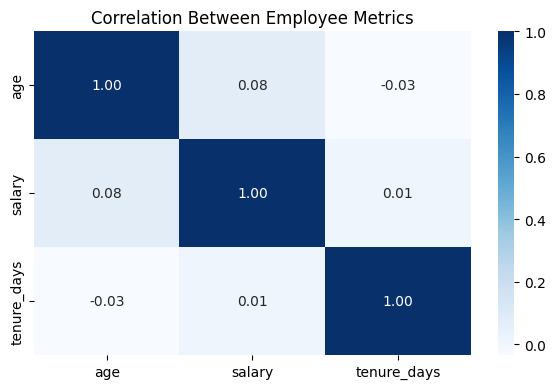

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlation (Pearson)
corr_df = df[numeric_cols].corr(method="pearson")
print("\n=== Correlation matrix (numeric employee metrics) ===")
print(corr_df)
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Employee Metrics")
plt.tight_layout()
plt.show()




In [ ]:
# Visualizations

In [ ]:
# Histograms for each numeric metric (salary, age, performance_score_ord, tenure_days

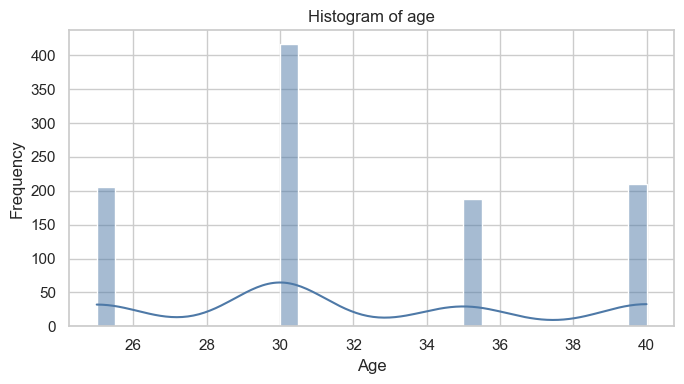

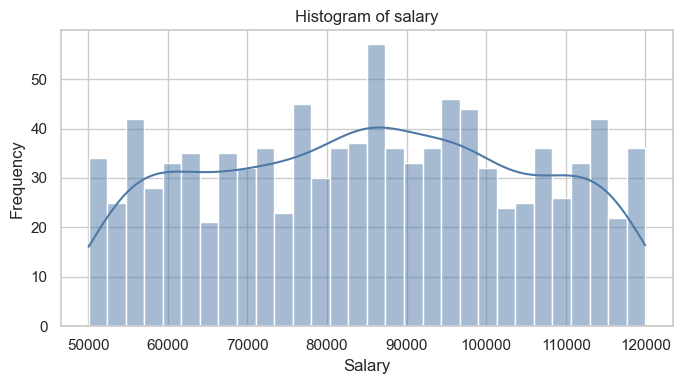

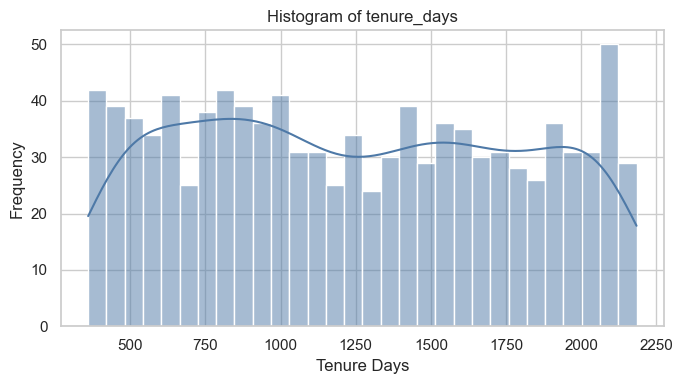

In [56]:
# Histogram
sns.set(style="whitegrid")

for col in numeric_cols:
    # Drop NaNs to avoid warnings
    data = df[col].dropna()
    if data.empty:
        print(f"Skip {col}: no data to plot")
        continue

    plt.figure(figsize=(7, 4))
    sns.histplot(data, bins=30, kde=True, color="#4e79a7")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

In [ ]:
# Line plots

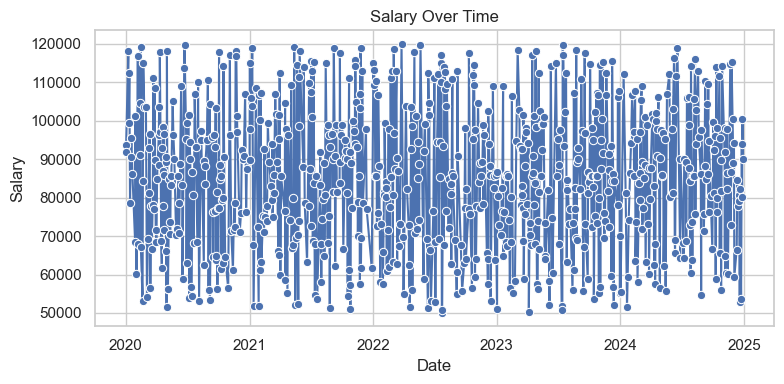

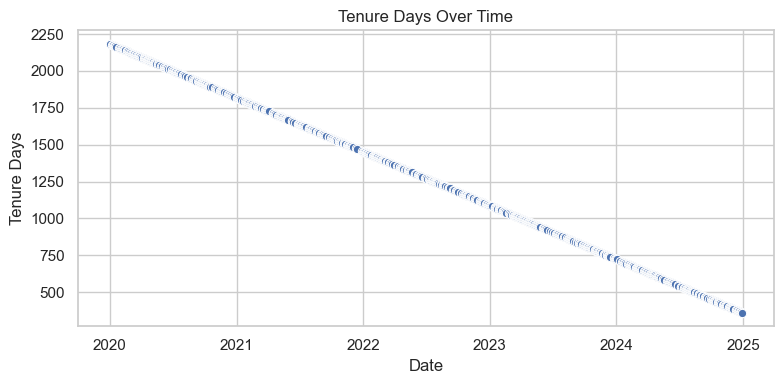

In [63]:
# Line plot over time
sns.set(style="whitegrid")

# Ensure join_date is datetime
df["join_date"] = pd.to_datetime(df["join_date"])

# Create date-only column
df["date_only"] = df["join_date"].dt.date

for col in numeric_cols:
    if col == "age":
        continue  # Skip age over time

    daily = (
        df.groupby("date_only")[col]
          .mean()
          .reset_index()
          .sort_values("date_only")
    )

    if daily[col].isna().all():
        print(f"Skip {col}: no data to plot")
        continue

    plt.figure(figsize=(8, 4))
    sns.lineplot(
        data=daily,
        x="date_only",
        y=col,
        marker="o"
    )

    plt.title(f"{col.replace('_', ' ').title()} Over Time")
    plt.xlabel("Date")
    plt.ylabel(col.replace("_", " ").title())

    plt.tight_layout()
    plt.show()


Conclusion 

After cleaning and examining the Messy Employee Dataset, it became clear that the data contained many missing values and inconsistent formats, making it necessary to correct issues with dates, salaries, and categorical fields. The analysis showed that employee hiring and salary payments tended to peak on certain days and in specific months, indicating possible seasonal or event-based recruitment. Most employees earned moderate salaries, with only a small number receiving much higher pay, while age data appeared fairly balanced but was not complete. Further analysis showed little to no relationship between salary and performance, and only a very weak relationship between salary and age, suggesting that pay is not strongly influenced by these factors.The visualizations and results emphasize the importance of improving data quality and provide useful insights for better recruitment planning and compensation decisions.

